In [ ]:
!pip install crepe
import crepe


In [ ]:
from typing import List, Tuple
import os
import pickle

import torch
from torch import Tensor
import numpy as np
import pandas as pd
import librosa
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
SAMPLE_RATE = 16000
train_hum_path = '/content/drive/MyDrive/hum_project/train/hum'
train_song_path = '/content/drive/MyDrive/hum_project/train/song'

test_hum_path = '/content/drive/MyDrive/hum_project/public_test/hum'
test_song_path = '/content/drive/MyDrive/hum_project/public_test/full_song'

save_data_path = '/content/drive/MyDrive/hum_project/transformed_data'
crepe_features_path = '/content/drive/MyDrive/hum_project/transformed_data/crepe_freq'

In [ ]:
train_hum_filenames = os.listdir(train_hum_path)
train_song_filenames = os.listdir(train_song_path)

train_hum_filepaths = [os.path.join(train_hum_path, x) for x in train_hum_filenames]
train_song_filepaths = [os.path.join(train_song_path, x) for x in train_song_filenames]

test_hum_filenames = os.listdir(test_hum_path)
test_song_filenames = os.listdir(test_song_path)

test_hum_filepaths = [os.path.join(test_hum_path, x) for x in test_hum_filenames]
test_song_filepaths = [os.path.join(test_song_path, x) for x in test_song_filenames]


In [ ]:
def read_audios(audio_paths: List[str]) -> List[Tuple[str, np.ndarray, int]]:
    """This function takes in a list of audio file paths and read all
    of them and return a list of tuples (filepath, audio, sr)"""
    
    all_audios = []
    for path in tqdm(audio_paths):
        audio, sr = librosa.load(path, sr=SAMPLE_RATE)
        all_audios.append((path, audio, sr))

    return all_audios

In [ ]:
train_hum_data = read_audios(train_hum_filepaths)
with open(os.path.join(save_data_path, 'train_hum_signals.pkl', ), 'wb') as f:
    pickle.dump(train_hum_data, f)

train_song_data = read_audios(train_song_filepaths)
with open(os.path.join(save_data_path, 'train_song_signals.pkl', ), 'wb') as f:
    pickle.dump(train_song_data, f)

test_hum_data = read_audios(test_hum_filepaths[1:])
with open(os.path.join(save_data_path, 'test_hum_signals.pkl', ), 'wb') as f:
    pickle.dump(test_hum_data, f)

test_song_data = read_audios(test_song_filepaths[:-1])
with open(os.path.join(save_data_path, 'test_song_signals.pkl', ), 'wb') as f:
    pickle.dump(test_song_data, f)

  0%|          | 0/2901 [00:00<?, ?it/s]

## CREPE transformation

In [ ]:
def crepe_transform(data) -> List[Tuple[str, np.ndarray]]:
    """Transform audio signals into frequency using crepe"""
    all_features = []
    for sample in tqdm(data):
        time, frequency, confidence, activation = crepe.predict(sample[1], SAMPLE_RATE, viterbi=True)
        all_features.append((sample[0], frequency))

    return all_features


In [ ]:
crepe_save_path = '/content/drive/MyDrive/hum_project/transformed_data/crepe_freq'
test_hum_signals = pickle.load(open('/content/drive/MyDrive/hum_project/transformed_data/test_hum_signals.pkl', 'rb'))


In [ ]:
test_hum_crepe = crepe_transform(test_hum_signals)
with open(os.path.join(crepe_save_path, 'test_hum_crepe.pkl'), 'wb') as f:
    pickle.dump(test_hum_crepe, f)

In [ ]:
test_song_signals = pickle.load(open('/content/drive/MyDrive/hum_project/transformed_data/test_song_signals.pkl', 'rb'))
test_song_crepe = crepe_transform(test_song_signals)
with open(os.path.join(crepe_save_path, 'test_song_crepe.pkl'), 'wb') as f:
    pickle.dump(test_song_crepe, f)

In [ ]:
train_song_signals = pickle.load(open('/content/drive/MyDrive/hum_project/transformed_data/train_song_signals.pkl', 'rb'))
train_song_crepe = crepe_transform(train_song_signals)
with open(os.path.join(crepe_save_path, 'train_song_crepe.pkl'), 'wb') as f:
    pickle.dump(train_song_crepe, f)

In [ ]:
train_hum_signals = pickle.load(open('/content/drive/MyDrive/hum_project/transformed_data/train_hum_signals.pkl', 'rb'))
train_hum_crepe = crepe_transform(train_hum_signals)
with open(os.path.join(crepe_save_path, 'train_hum_crepe.pkl'), 'wb') as f:
    pickle.dump(train_hum_crepe, f)

In [ ]:
# pad, cut and arrange all train, test data into a list
# of (song_tensor, hum_tensor, song_id )
# split train data into train and val
test_hum_freq = pickle.load(open('/content/drive/MyDrive/hum_project/transformed_data/crepe_freq/test_hum_crepe.pkl', 'rb'))
test_song_freq = pickle.load(open('/content/drive/MyDrive/hum_project/transformed_data/crepe_freq/test_song_crepe.pkl', 'rb'))
train_hum_freq = pickle.load(open('/content/drive/MyDrive/hum_project/transformed_data/crepe_freq/train_hum_crepe.pkl', 'rb'))
train_song_freq = pickle.load(open('/content/drive/MyDrive/hum_project/transformed_data/crepe_freq/train_song_crepe.pkl', 'rb'))

In [ ]:
train_annotation = pd.read_csv('/content/drive/MyDrive/hum_project/train/train_meta.csv')

,music_id,song_path,hum_path
0,1075110394,train/song/0000.mp3,train/hum/0000.mp3
1,1079628790,train/song/0001.mp3,train/hum/0001.mp3
2,1078271932,train/song/0002.mp3,train/hum/0002.mp3
3,1076457212,train/song/0003.mp3,train/hum/0003.mp3
4,1073861056,train/song/0004.mp3,train/hum/0004.mp3
...,...,...,...
2896,1079334752,train/song/2896.mp3,train/hum/2896.mp3
2897,1074004286,train/song/2897.mp3,train/hum/2897.mp3
2898,1073793350,train/song/2898.mp3,train/hum/2898.mp3
2899,1079416855,train/song/2899.mp3,train/hum/2899.mp3


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
train_meta, val_meta = train_test_split(train_annotation, test_size = 300, random_state = 42)

In [ ]:
def create_dataset(meta_data: pd.DataFrame, song, hum) -> List[Tuple[Tensor, Tensor, int]]:
    data = []
    for i, row in tqdm(meta_data.iterrows()):
        song_filename =  row['song_path'].split('/')[-1]
        hum_filename = row['hum_path'].split('/')[-1]
        music_id = row['music_id']
        tup = [music_id, song_filename, hum_filename]
        for s in song:
            if s[0].split('/')[-1] == song_filename:
                tup.append(s[1])
                break
        for h in hum:
            if h[0].split('/')[-1] == hum_filename:
                tup.append(h[1])
        data.append(tuple(tup))

    return data

In [ ]:
train_data = create_dataset(train_meta, train_song_freq, train_hum_freq)
val_data = create_dataset(val_meta, train_song_freq, train_hum_freq)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

NameError: ignored

In [ ]:
MIN = 20
MAX = 600
LOW = -1
HIGH = 1
scaler = lambda x: LOW + ((x - MIN)*(HIGH-LOW))/(MAX-MIN)
def plot_freq(index):
    print(f"song mean {np.mean(train_data[index][3])}")
    print(f"hum mean {np.mean(train_data[index][4])}")
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.plot(train_data[index][3], label = 'song')
    plt.plot(train_data[index][4], label = 'hum')

    plt.subplot(1,2,2)
    plt.plot(scaler(train_data[index][3]), label = 'song')
    plt.plot(scaler(train_data[index][4]), label = 'hum')

    plt.legend()

song mean 273.95130107506685
hum mean 351.7790722638768


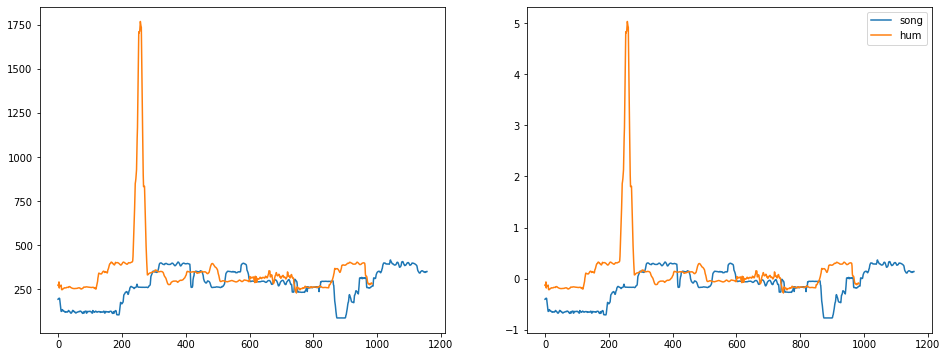

In [ ]:
plot_freq(352)

In [ ]:
with open('/content/drive/MyDrive/hum_project/transformed_data/crepe_freq/train_data.pkl', 'wb') as f:
    pickle.dump(train_data, f)
with open('/content/drive/MyDrive/hum_project/transformed_data/crepe_freq/val_data.pkl', 'wb') as f:
    pickle.dump(val_data, f) 

In [ ]:
# normalize, cut outliers 
# finer crepe 1 ms
# remove samples that have too far mean
# avoid one batch has two tup of the same song

In [ ]:
np.concatenate([x, x]).shape

(218,)

In [ ]:
x = np.random.randn((109))

In [ ]:
x.shape

(109,)